In [1]:
!pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1wd4DXf4nb9dWwieEc3LMkfHfc5V51bha'}) 
downloaded.GetContentFile('train.csv') 
downloaded = drive.CreateFile({'id':'1UUPUpFC5hiPO9066Cz7tfUzlmOK5SsES'}) 
downloaded.GetContentFile('test.csv') 

In [77]:
#importing necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing and conbining data from CSV's

In [87]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Q1: In training set, which features are available?

In [10]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Q2: In training set, which features are categorical? <br>
Ans: Features which can be grouped are called categorical, in dataset categorical features are PassengerId, Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked.

Q3: In training set, which features are numerical (e.g., discrete, continuous, or time series based)? <br>
Ans: Age, SibSp, Parch, Fare.

Q4: In training set, which features are mixed data types? <br>
Ans: Ticket is a mixed data type, because it has both numeric and alphanumeric values. 

Q5: In training set, which features contain blank, null or empty values? In test set, which features
contain blank, null or empty values?

In [17]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Features which contain blank, null or empty values are Age, Cabin, Embarked

Q6: In training set, what are the data types (e.g., integer, floats or strings ) for various features?

In [24]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Q7: In training set, to understand the distribution of numerical feature values across the samples,
please list the properties, including count, mean, std, min, 25% percentile, 50% percentile, 75%
percentile, max, of numerical features?

In [27]:
train_df[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Q8. In training set, to understand the distribution of categorical features, we define: count is the total
number of categorical values per column; unique is the total number of unique categorical values per
column; top is the most frequent categorical value; freq is the total number of the most frequent
categorical value. Please list the properties, including count, unique, top, freq, of categorical
features?

In [62]:
train_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].dropna().astype(str).describe(include=['object'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183,183,183,183,183,183,183,183,183,183,183,183
unique,183,2,3,183,2,63,4,4,127,93,133,3
top,446,1,1,"Bishop, Mr. Dickinson H",male,36.0,0,0,19950,26.55,B96 B98,S
freq,1,123,158,1,95,11,110,122,4,7,4,116


Q9: In training set, can you observe significant correlation (average survivied ratio>0.5) among the
group of Pclass=1 and Survived? If Pclass has significant correlation with Survivied, we should
include this feature in the predictive model. Based on your computation, will you include this feature
in the predictive model?

In [76]:
train_df[['Pclass', 'Survived']].groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Q10: In training set, are Women (Sex=female) were more likely to have survived?

In [75]:
train_df[['Sex', 'Survived']].groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

11: In training set, let us start by understanding correlations between a numeric feature (Age) and
our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical
variables like Age where banding or ranges will help identify useful patterns. The histogram can
indicate distribution of samples using automatically defined bins or equally ranged bands. This helps
us answer questions relating to specific bands (e.g., infants, old). Please plot the histograms
between ages and Survived (Figure 1 is an example), and answer the following questions:<br>

* <b>Do infants (Age <=4) have high survival rate?</b> : Yes
* <b>Do oldest passengers (Age = 80) survive?</b> : Yes 
* <b>Do large number of 15-25 year olds not survive?</b> : Yes <br>

Based on your analysis of the histograms,
* <b>Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)</b> : Yes
* <b>Should we should band age groups?</b> : Yes



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x7f58d682cf60>,
 <a list of 20 Text major ticklabel objects>)

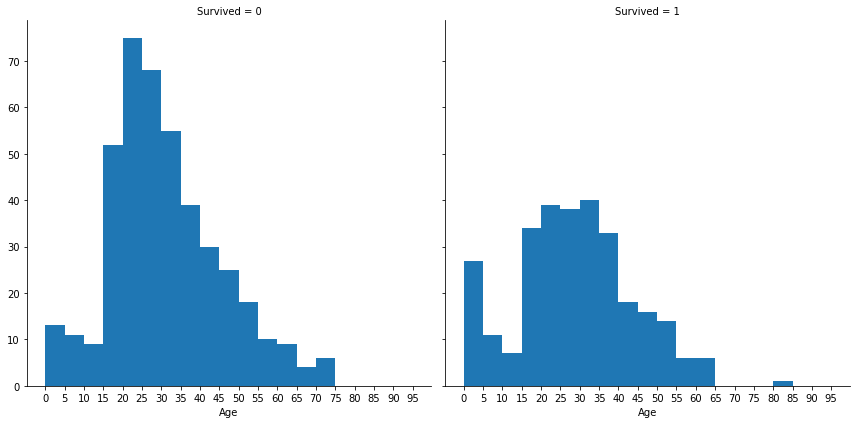

In [81]:
histogram= sns.FacetGrid(train_df, col ='Survived', size=6)
histogram.map(plt.hist, 'Age', bins=range(0,100, 5))
plt.xticks(range(0, 100, 5))

Q12: In training set, we can combine three features (age, Pclass, and survivied) for identifying
correlations using a single plot. This can be done with numerical and categorical features which
have numeric values. Here is an example plot: <br>
Does Pclass=3 have most passengers, however most did not survive? Yes <hr>
Do infant passengers in Pclass=2 and Pclass=3 mostly survive? Yes <br>
Do most passengers in Pclass=1 survive? Yes<br>
Does Pclass vary in terms of Age distribution of passengers? Yes<br>
Should we consider Pclass for model training? Yes<br>



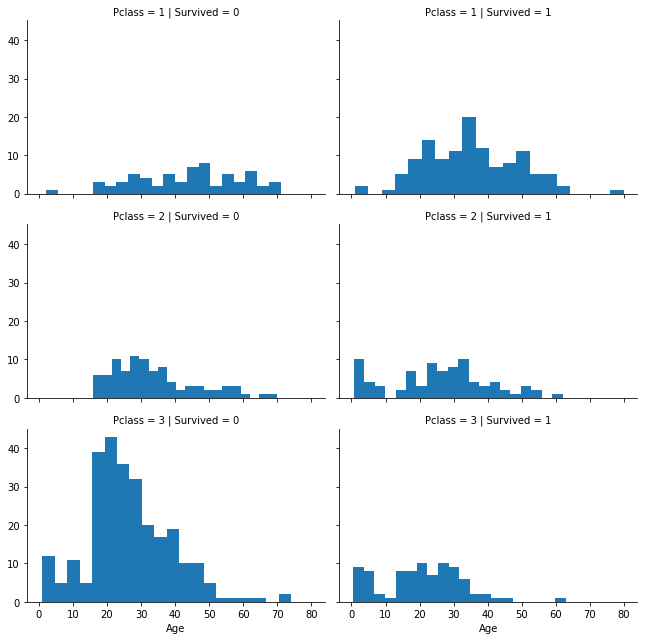

In [85]:
histograms = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=1.5)
histograms.map(plt.hist, 'Age', bins=20)
histograms.add_legend();

Q13: In training set, we want to correlate categorical features (with non-numeric values) and numeric
features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-
numeric), Fare (Numeric continuous), with Survived (Categorical numeric). Please plot a figure to
illustrate the correlations of Embarked, Sex, Fare, and Survivied. Here is a sample plot (Figure 3): <br>




*   Do higher fare paying passengers have better survival? Yes
*   Should we consider banding fare feature? Yes



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


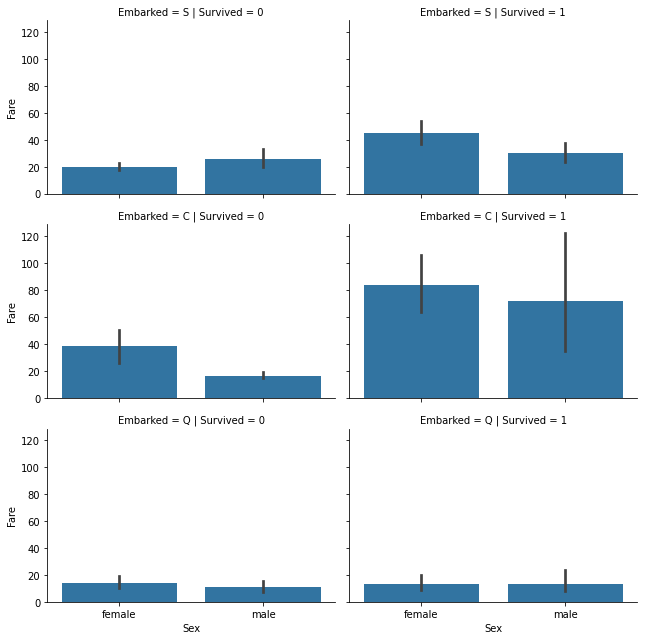

In [164]:
histograms = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=1.5)
histograms.map(sns.barplot, 'Sex', 'Fare')
histograms.add_legend()

Q14: In training set, what is the rate of duplicates for the Ticket feature? Is there a correlation
between Ticket and survival? Should we drop the Ticket feature?

In [86]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [127]:
combined_df = train_df.append(test_df)

Q15: In the training set, Is the Cabin feature complete? How many null values there are in the Cabin
features of the combined dataset of training and test dataset? Should we drop the Cabin feature?

In [183]:
combined_df['Cabin'].fillna('fillnullvalues').describe()

count                891
unique               148
top       fillnullvalues
freq                 687
Name: Cabin, dtype: object

In [185]:
combined_df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

Q16: In the training set, we can convert features which contain strings to numerical values. This is
required by most model algorithms. Doing so will also help us in achieving the feature completing
goal. In this question ,please convert Sex feature to a new feature called Gender where female=1
and male=0.

In [170]:
train_df.loc[train_df.Sex == 'male', 'Gender'] = 0
train_df.loc[train_df.Sex == 'female', 'Gender'] = 1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Q17: In the training set, we start estimating and completing features with missing or null values. We
will first do this for the Age feature. We can consider three methods to complete a numerical
continuous feature. A simple way is to generate random numbers between mean and standard
deviation. More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithm
to select the top-K most similar data points, and then use the top-K most similar data points to
impute the missing values of ages.

In [176]:
for i in range(len(train_df['Age'])):
    if np.isnan(train_df["Age"][i]) == True:
        train_df.at[i, 'Age']=np.random.uniform(train_df['Age'].mean(),train_df['Age'].std())

train_df['Age'].isna().sum()

0

Q18: Completing a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences.

In [177]:
train_df.groupby(['Embarked']).count()
train_df['Embarked'].fillna('S')
train_df['Embarked'].isna().sum()

0

Q19: In the training set, complete and convert a numeric feature. Please complete the Fare feature
for single missing value in test dataset using mode to get the value that occurs most frequently for
this feature.

In [178]:
mode=train_df['Fare'].mode()
train_df['Fare'].fillna(mode,inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Q20: In the training set, convert the Fare feature to ordinal values based on the FareBand defined
follows:

In [182]:
train_df['FareBand']=0
train_df.loc[(train_df['Fare']>=-0.001) & (train_df['Fare']<7.91),['FareBand']]=0
train_df.loc[(train_df['Fare']>=7.91) & (train_df['Fare']<14.454),['FareBand']]=1
train_df.loc[(train_df['Fare']>=14.454) & (train_df['Fare']<31.0),['FareBand']]=2
train_df.loc[(train_df['Fare']>=31.0) & (train_df['Fare']<512.329),['FareBand']]=3

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
